In [1]:
## Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
#electricity price
e_price = pd.read_csv('./data/e_price.csv')
s_price = pd.read_csv('./data/s_price.csv')

In [5]:
e_price.head() #hourly electricity price per unit kWh

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,1.2,1.0,1.1,0.32,0.6015,0.2962,0.3041,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
1,2022-09-01 01:00:00,1.2,1.0,1.1,0.32,0.3314,0.2962,0.3015,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
2,2022-09-01 02:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
3,2022-09-01 03:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
4,2022-09-01 04:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05


In [7]:
e_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 1683 entries, time to 2682
dtypes: float64(1682), object(1)
memory usage: 112.5+ MB


In [138]:
#count which stations have fixed prices
count_varied_e_price = e_price.apply(lambda x: len(x.unique()) > 1).sum()
count_varied_e_price

391

In [136]:
e_price.columns.nunique() #There are 1683 columns (1682 stations) and 391 stations are fixed priced hence most have some variation of price.

1683

## Data Dictionary

The 'electricity price' dataframe is the total price of electricity in Yuan (1 yuan == 5.2 Baht) per each hour of charging per unit kWh.

| Variable | Description | Details |
|----------|-------------|---------|
| time | Time | Year-Month-Day Hour:Minute:Seconds |
| 1001-2682 | Station IDs | Charging Station IDs from 1001 to 2682. |

In [ ]:
# choose a random station (station no. 1009).

In [9]:
e_price_1009 = e_price[['time', '1009']] #station 1009 electricity price uses fixed price
e_price_1009.head()

,time,1009
0,2022-09-01 00:00:00,0.3067
1,2022-09-01 01:00:00,0.3067
2,2022-09-01 02:00:00,0.3067
3,2022-09-01 03:00:00,0.3067
4,2022-09-01 04:00:00,0.3067


In [13]:
e_price.describe().round(2)

,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
count,8760.0,8760.0,8760.0,8760.00,8760.00,8760.00,8760.00,8760.0,8760.00,8760.00,...,8760.0,8760.00,8760.00,8760.00,8760.00,8760.0,8760.00,8760.00,8760.0,8760.00
mean,1.2,1.0,1.1,0.74,0.74,0.71,0.70,1.0,0.70,0.65,...,0.7,0.77,0.65,0.72,0.72,0.0,0.72,0.72,1.0,1.05
std,0.0,0.0,0.0,0.33,0.33,0.32,0.31,0.0,0.33,0.33,...,0.0,0.26,0.24,0.00,0.00,0.0,0.00,0.00,0.0,0.00
min,1.2,1.0,1.1,0.32,0.32,0.30,0.30,1.0,0.24,0.24,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
25%,1.2,1.0,1.1,0.32,0.32,0.30,0.30,1.0,0.31,0.24,...,0.7,0.44,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
50%,1.2,1.0,1.1,0.79,0.79,0.74,0.74,1.0,0.74,0.70,...,0.7,0.77,0.65,0.72,0.72,0.0,0.72,0.72,1.0,1.05
75%,1.2,1.0,1.1,1.05,1.10,1.09,1.09,1.0,1.05,1.02,...,0.7,1.06,0.95,0.72,0.72,0.0,0.72,0.72,1.0,1.05
max,1.2,1.0,1.1,1.40,1.40,1.09,1.09,1.0,1.41,1.31,...,0.7,1.13,0.95,0.72,0.72,0.0,0.72,0.72,1.0,1.05


In [21]:
# are there negative electricity prices?
e_price.min().unique()

array(['2022-09-01 00:00:00', 1.2, 1.0, 1.1, 0.32, 0.2962, 0.2442, 0.24,
       1.3, 1.28, 1.7, 0.8755, 0.6998, 0.27, 0.298, 0.29, 1.23, 0.737,
       0.8, 0.9, 0.72, 0.3, 0.26, 0.34, 1.045, 1.05, 0.28, 0.95, 0.35,
       0.7, 0.717, 0.385, 1.25, 0.2655, 0.54, 0.0, 0.25, 1.08, 0.3201,
       0.86, 0.73, 0.4, 2.8, 1.8, 1.21, 1.06, 0.237, 0.23, 0.901, 0.5,
       0.98, 0.399, 1.15, 0.256, 1.5, 0.75, 0.52, 0.33, 1.04, 0.45, 0.77,
       0.69, 0.82, 0.71, 1.33, 0.2485, 0.816, 0.2676, 0.6879, 0.38, 1.03,
       1.01, 0.3044, 0.2794, 1.32, 1.18, 0.93, 1.6, 0.938, 0.3094, 0.92,
       0.2, 1.036, 0.31, 0.2801, 0.41, 0.2594, 1.14, 0.78, 0.699, 0.4801,
       0.76, 0.85, 1.16, 0.96, 0.83, 1.086, 0.79, 0.6999, 0.36, 0.74,
       1.35, 0.89, 0.2905, 0.7484, 1.43, 1.34, 1.17, 0.284, 0.3194, 1.24,
       1.27, 0.3161, 0.68, 1.199, 0.47, 0.7384, 0.2374, 0.84, 0.88,
       0.3405, 1.09, 5.0, 0.2779, 0.703, 0.2587, 0.396, 0.2844, 0.94, 1.4,
       0.3962, 0.2938, 0.3618, 0.997, 1.11, 0.81, 0.7699, 0.9

In [39]:
#What is the maximum electricity price? 5 yuan per kWh
np.max(e_price.iloc[:, 1:])

5.0

In [41]:
e_price.columns[(e_price == 5.0).any()].tolist() #most expensive electricity price is station 2038, 5 yuan

['2038']

In [45]:
# in case need to convert to Baht
# e_price_baht = e_price.iloc[:, 1:] * 5.2 

In [142]:
# at what time did the max. price occur?
e_price_2038 = e_price[['time', '2038']]
e_price_2038

,time,2038
0,2022-09-01 00:00:00,5.0
1,2022-09-01 01:00:00,5.0
2,2022-09-01 02:00:00,5.0
3,2022-09-01 03:00:00,5.0
4,2022-09-01 04:00:00,5.0
...,...,...
8755,2023-08-31 19:00:00,5.0
8756,2023-08-31 20:00:00,5.0
8757,2023-08-31 21:00:00,5.0
8758,2023-08-31 22:00:00,5.0


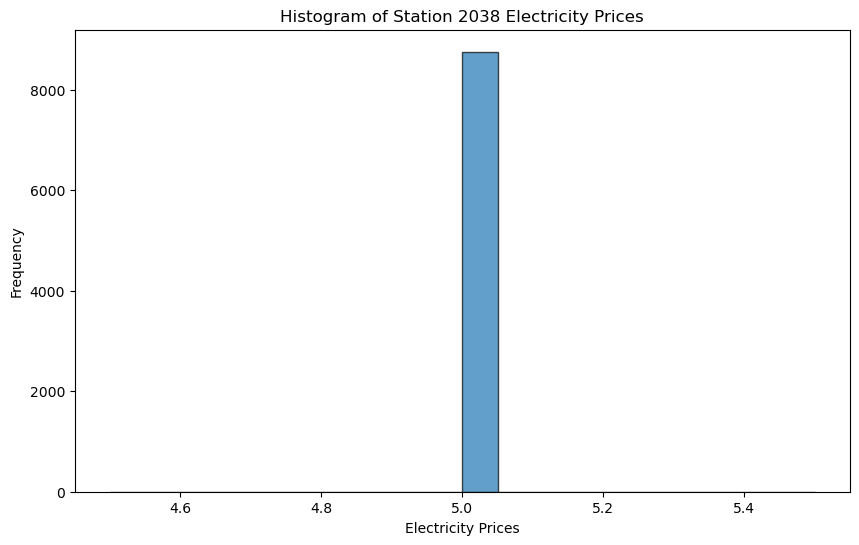

In [49]:
plt.figure(figsize=(10, 6)) 
plt.hist(e_price['2038'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices') 
plt.ylabel('Frequency') 
plt.title('Histogram of Station 2038 Electricity Prices')
plt.show() 

In [51]:
e_price['2038'].unique()

array([5.])

In [53]:
num_zeros = (e_price == 0).sum().sum()
(num_zeros/(e_price.size))*100 #30% of the data is 0 in price. Reasons for zero: idle station, blackout, discontinued use etc. which are information for analysis.

0.3069914834620717

In [55]:
e_price_2675 = e_price[['time', '2675']]

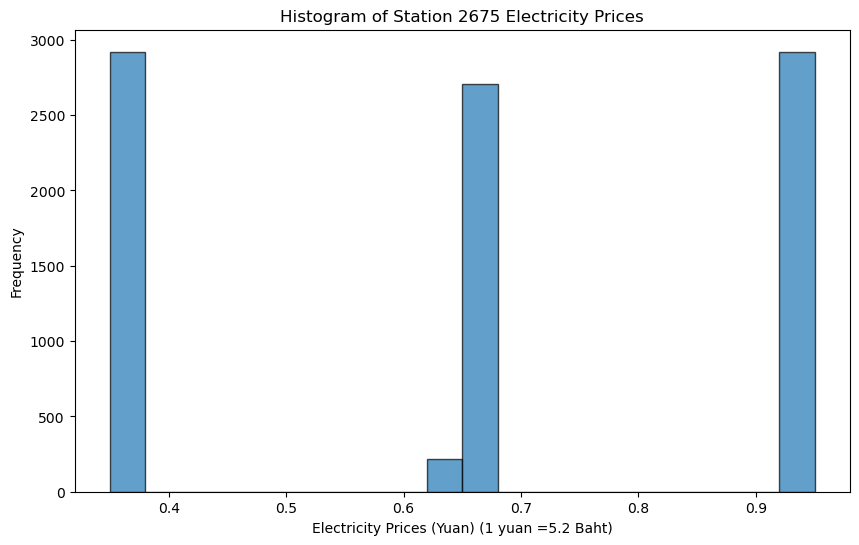

In [61]:
plt.figure(figsize=(10, 6)) 
plt.hist(e_price['2675'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices (Yuan) (1 yuan =5.2 Baht)') 
plt.ylabel('Frequency') 
plt.title('Histogram of Station 2675 Electricity Prices')
plt.show() #electricity prices

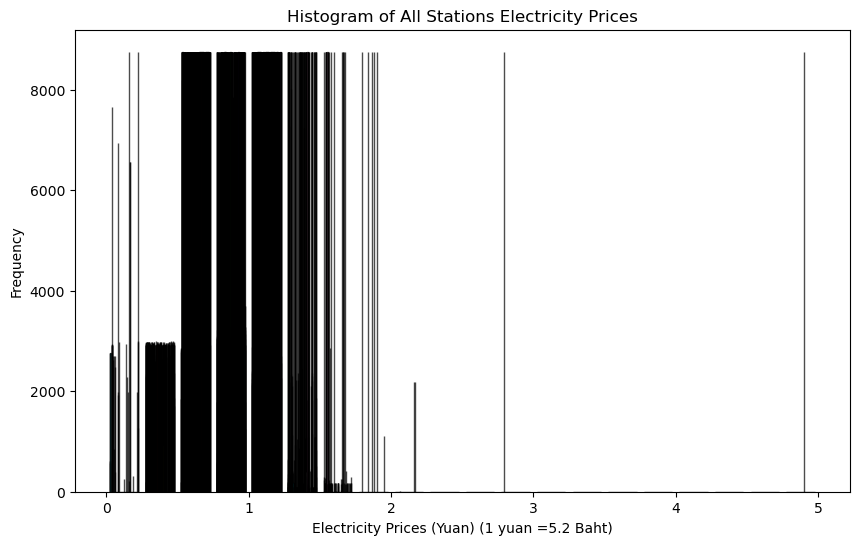

In [63]:
plt.figure(figsize=(10, 6)) 
plt.hist(e_price.iloc[:, 1:], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices (Yuan) (1 yuan =5.2 Baht)') 
plt.ylabel('Frequency') 
plt.title('Histogram of All Stations Electricity Prices')
plt.show() #most are under 2 yuan (2* 5.2 = 10.4 baht) 

In [ ]:
# which station had the highest variance in pricing? i.e. most standard deviation in price.

In [79]:
highest_dynamic = e_price.iloc[:, 1:].std().idxmax()
highest_dynamic

'2165'

In [81]:
e_price_2165 = e_price[['time', '2165']]

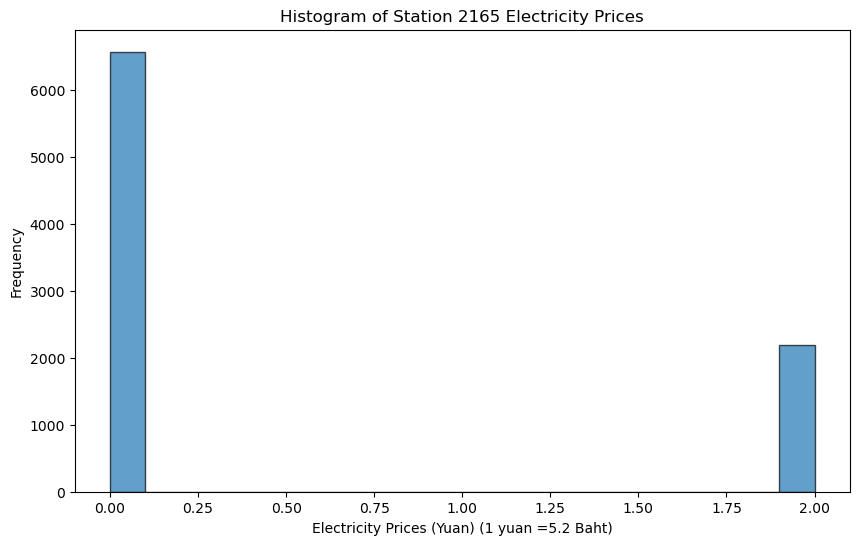

In [83]:
plt.figure(figsize=(10, 6)) 
plt.hist(e_price['2165'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices (Yuan) (1 yuan =5.2 Baht)') 
plt.ylabel('Frequency') 
plt.title('Histogram of Station 2165 Electricity Prices')
plt.show() 

In [87]:
e_price_2177 = e_price[['time', '2177']] #another random station 2177

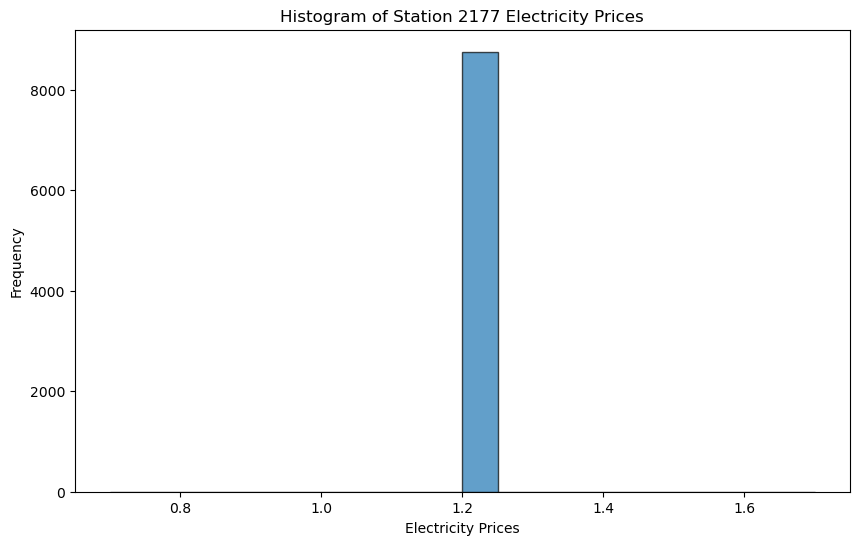

In [89]:
plt.figure(figsize=(10, 6)) 
plt.hist(e_price['2177'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices') 
plt.ylabel('Frequency') 
plt.title('Histogram of Station 2177 Electricity Prices')
plt.show() 

In [92]:
# Times series EDA, try station 2675's output 
e_price_st2675 = e_price[['time', '2675']]

In [94]:
e_price_st2675 = (e_price_st2675
              .set_index(pd.DatetimeIndex(e_price_st2675['time']))
              .drop('time', axis=1)
              .sort_index())

e_price_st2675.head()

,2675
time,
2022-09-01 00:00:00,0.35
2022-09-01 01:00:00,0.35
2022-09-01 02:00:00,0.35
2022-09-01 03:00:00,0.35
2022-09-01 04:00:00,0.35


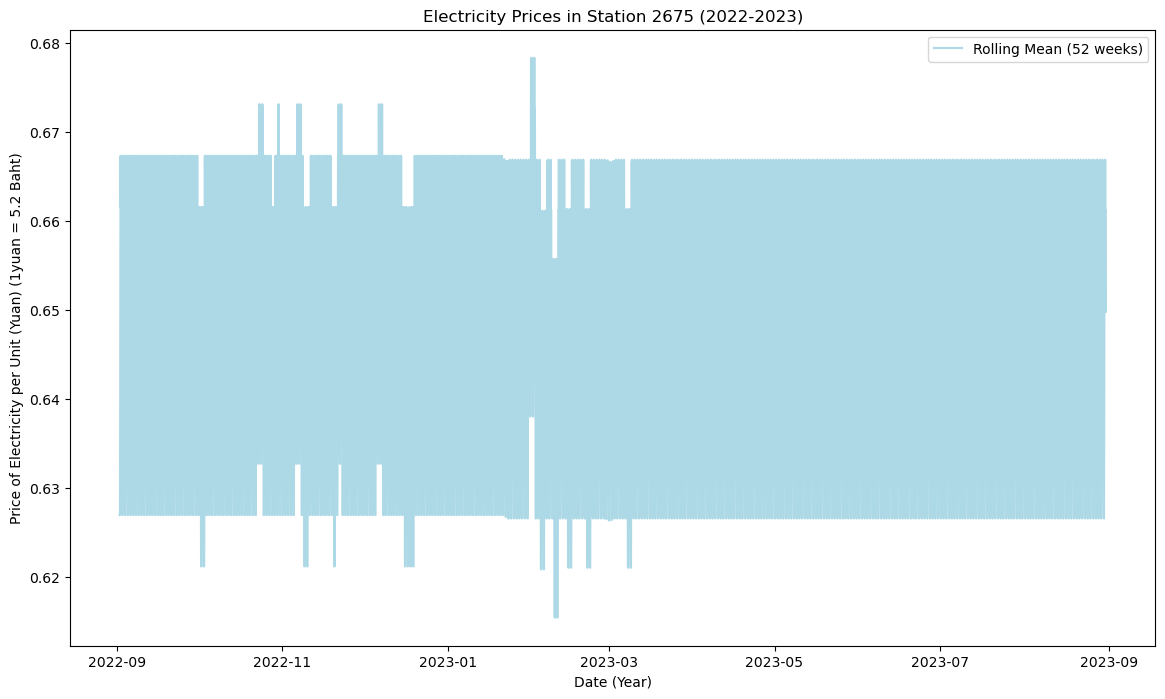

In [100]:
#plot trend MA=3 (moving average 3 weeks)

plt.figure(figsize=(14,8))
plt.plot(e_price_st2675['2675'].rolling(52, center=True).mean(), color='lightblue', label='Rolling Mean (52 weeks)')
plt.title('Electricity Prices in Station 2675 (2022-2023)')
plt.xlabel('Date (Year)')
plt.ylabel('Price of Electricity per Unit (Yuan) (1yuan = 5.2 Baht)')
plt.legend()
plt.show() #

In [102]:
# Times series EDA, try station 1380's output , which previously in the energy dataframe had 0 Energy in the last part of 2023, the e_price should also be 0.
e_price_st1380 = e_price[['time', '1380']]

In [104]:
e_price_st1380 = (e_price_st1380
              .set_index(pd.DatetimeIndex(e_price_st1380['time']))
              .drop('time', axis=1)
              .sort_index())

e_price_st1380.head()

,1380
time,
2022-09-01 00:00:00,0.3157
2022-09-01 01:00:00,0.3044
2022-09-01 02:00:00,0.3044
2022-09-01 03:00:00,0.3044
2022-09-01 04:00:00,0.3044


In [108]:
e_price_st1380.tail() #my assumption was false, the electricity price still has a value even when the station wasnt using the electricity for EV.

,1380
time,
2023-08-31 19:00:00,1.0147
2023-08-31 20:00:00,1.1009
2023-08-31 21:00:00,0.8199
2023-08-31 22:00:00,0.7484
2023-08-31 23:00:00,0.3977


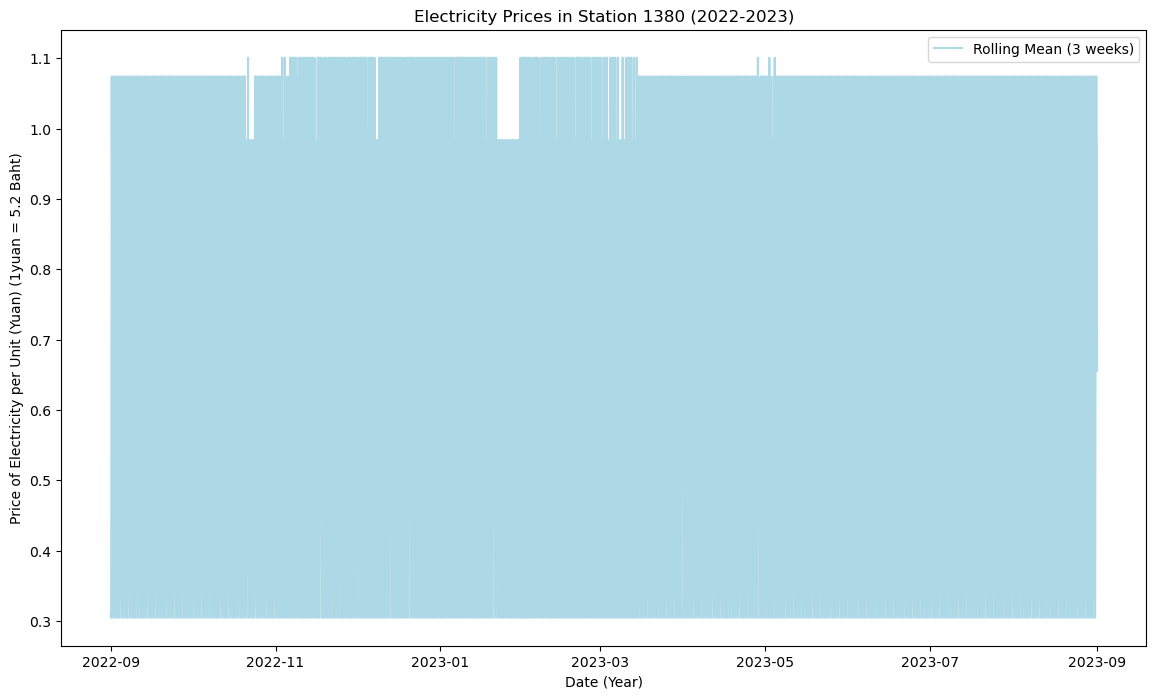

In [106]:
#plot trend MA=3 (moving average 3 weeks)

plt.figure(figsize=(14,8))
plt.plot(e_price_st1380['1380'].rolling(3, center=True).mean(), color='lightblue', label='Rolling Mean (3 weeks)')
plt.title('Electricity Prices in Station 1380 (2022-2023)')
plt.xlabel('Date (Year)')
plt.ylabel('Price of Electricity per Unit (Yuan) (1yuan = 5.2 Baht)')
plt.legend()
plt.show() #

In [ ]:
# The electricity price is set case by case for the region/area/station/demand/etc. 
# So these 'e_price' values are the official values of electricity set for that particular station, regardless of use.

In [ ]:
# although there are different prices for the charging station, the standard deviation is low, price range is only between 0-<5 yuan.

In [ ]:
# Summary, no zeroes were dropped and no outliers were removed as the price data contains important information about the charging station.

## Station Electricity Price EDA

In [113]:
s_price.head()

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,0.47,0.66,0.76,0.76,0.4851,1.1438,1.0908,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4530,0.76,0.76,0.52,0.7
1,2022-09-01 01:00:00,0.47,0.66,0.76,0.76,0.7552,1.1438,1.2405,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4522,0.76,0.76,0.52,0.7
2,2022-09-01 02:00:00,0.47,0.66,0.76,0.76,0.7660,1.1438,1.2410,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4524,0.76,0.76,0.52,0.7
3,2022-09-01 03:00:00,0.47,0.66,0.76,0.76,0.7668,1.1438,1.2410,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4523,0.76,0.76,0.52,0.7
4,2022-09-01 04:00:00,0.47,0.66,0.76,0.76,0.7667,1.1438,1.2410,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4531,0.76,0.76,0.52,0.7


In [118]:
s_price_st1380 = s_price[['time', '1380']]

In [120]:
s_price_st1380 = (s_price_st1380
              .set_index(pd.DatetimeIndex(s_price_st1380['time']))
              .drop('time', axis=1)
              .sort_index())

s_price_st1380.head()

,1380
time,
2022-09-01 00:00:00,1.1290
2022-09-01 01:00:00,1.2456
2022-09-01 02:00:00,1.2456
2022-09-01 03:00:00,1.2456
2022-09-01 04:00:00,1.2456


In [122]:
s_price_st1380.tail()

,1380
time,
2023-08-31 19:00:00,0.6209
2023-08-31 20:00:00,0.4491
2023-08-31 21:00:00,0.3714
2023-08-31 22:00:00,0.3516
2023-08-31 23:00:00,0.7023


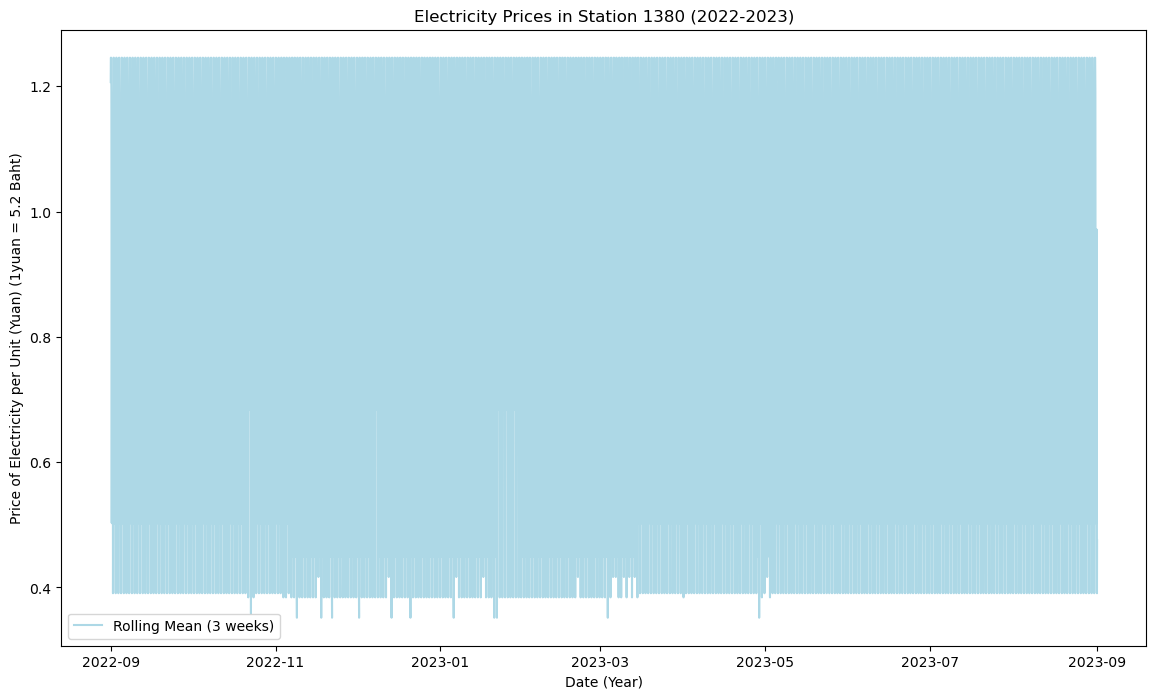

In [124]:
#plot trend MA=3 (moving average 13 weeks)

plt.figure(figsize=(14,8))
plt.plot(s_price_st1380['1380'].rolling(3, center=True).mean(), color='lightblue', label='Rolling Mean (13 weeks)')
plt.title('Electricity Prices in Station 1380 (2022-2023)')
plt.xlabel('Date (Year)')
plt.ylabel('Price of Electricity per Unit (Yuan) (1yuan = 5.2 Baht)')
plt.legend()
plt.show() #

In [126]:
# Resample e_price data by month and calculate statistics for station 1380
e_price_st1380_monthly = e_price_st1380.resample('ME').sum() 
e_price_st1380_monthly

,1380
time,
2022-09-30,511.6620
2022-10-31,527.6329
2022-11-30,513.6419
2022-12-31,530.2266
2023-01-31,528.6606
2023-02-28,476.6838
2023-03-31,526.2341
2023-04-30,512.0052
2023-05-31,529.3700


In [128]:
# Resample s_price data by month and calculate statistics for station 1380
s_price_st1380_monthly = s_price_st1380.resample('ME').sum() 
s_price_st1380_monthly

,1380
time,
2022-09-30,630.9240
2022-10-31,653.9295
2022-11-30,629.3518
2022-12-31,643.9734
2023-01-31,655.3394
2023-02-28,586.2162
2023-03-31,659.1828
2023-04-30,631.3476
2023-05-31,651.1459


In [150]:
diff = s_price_st1380_monthly - e_price_st1380_monthly
diff

,1380
time,
2022-09-30,119.2620
2022-10-31,126.2966
2022-11-30,115.7099
2022-12-31,113.7468
2023-01-31,126.6788
2023-02-28,109.5324
2023-03-31,132.9487
2023-04-30,119.3424
2023-05-31,121.7759


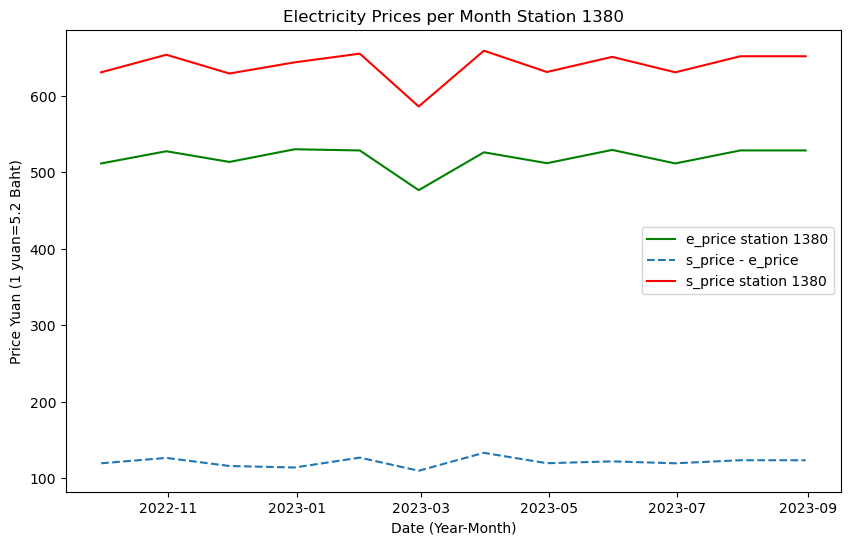

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(e_price_st1380_monthly, label='e_price station 1380', color='green')
plt.plot(diff, label='s_price - e_price', ls='--')
plt.plot(s_price_st1380_monthly, label='s_price station 1380', color ='red')
plt.xlabel('Date (Year-Month)') 
plt.ylabel('Price Yuan (1 yuan=5.2 Baht)') 
plt.title('Electricity Prices per Month Station 1380') 
plt.legend() 
plt.show()

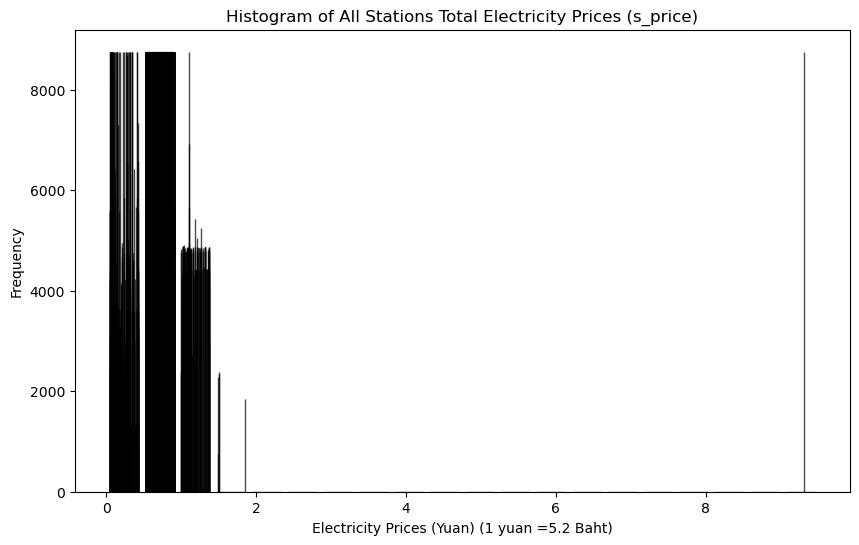

In [130]:
plt.figure(figsize=(10, 6)) 
plt.hist(s_price.iloc[:, 1:], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices (Yuan) (1 yuan =5.2 Baht)') 
plt.ylabel('Frequency') 
plt.title('Histogram of All Stations Total Electricity Prices (s_price)')
plt.show() #mo

In [ ]:
# s_price i greater than e_price thus e_price is the base price, whereas s _price is what the station charges you. s_price - e_price = profit diffrence

In [ ]:
# s_price - e_price  = profit from elec price. Are there peaks/dips with the most profits? Which months are more profitable?
# dip in profits from end feb/ beginning march.
# slight rise in profit after end of Feb dip.